In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import eval_models
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Digits

In [3]:
X_dig_train,X_dig_test,y_dig_train,y_dig_test = eval_models.get_train_test('digits')

In [4]:
X_dig_train, X_dig_test = eval_models.drop_constants(X_dig_train, X_dig_test)

In [6]:
digits_results = pd.DataFrame(columns = ['Classifier', 'BA score', 'Wrapper', 'k', 'scaled'])
ss = StandardScaler()
X_dig_train_scaled = pd.DataFrame(ss.fit_transform(X_dig_train), columns=X_dig_train.columns)
X_dig_test_scaled = pd.DataFrame(ss.transform(X_dig_test), columns=X_dig_test.columns)
for k in [50, 100, 150, 200, 250, 300, 350]:
    for scale in [False, True]:
        if scale:
            X_train = X_dig_train_scaled
            X_test = X_dig_test_scaled
        else:
            X_train = X_dig_train
            X_test = X_dig_test
    k_res = eval_models.estimator_wrappers(X_train, X_test, y_dig_train, y_dig_test)
    k_res['k'] = k
    k_res['scaled'] = scale
    digits_results = pd.concat((digits_results, k_res), ignore_index=True)

[19:56:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [7]:
digits_results

,Classifier,BA score,Wrapper,k,scale,scaled
0,LogisticRegression,0.926000,RandomForestClassifier,50,NaN,True
1,RandomForestClassifier,0.945333,RandomForestClassifier,50,NaN,True
2,AdaBoostClassifier,0.920667,RandomForestClassifier,50,NaN,True
3,LGBMClassifier,0.948667,RandomForestClassifier,50,NaN,True
4,XGBClassifier,0.955333,RandomForestClassifier,50,NaN,True
...,...,...,...,...,...,...
100,LogisticRegression,0.956000,LogisticRegression,350,NaN,True
101,RandomForestClassifier,0.958667,LogisticRegression,350,NaN,True
102,AdaBoostClassifier,0.952000,LogisticRegression,350,NaN,True
103,LGBMClassifier,0.962667,LogisticRegression,350,NaN,True


# Artificial

In [8]:
X_art_train,X_art_test,y_art_train,y_art_test = eval_models.get_train_test('artificial')

In [9]:
X_art_train, X_art_test = eval_models.drop_constants(X_art_train, X_art_test)

In [10]:
art_results = pd.DataFrame(columns = ['Classifier', 'BA score', 'Wrapper', 'k', 'scaled'])
ss_art = StandardScaler()
X_art_train_scaled = pd.DataFrame(ss_art.fit_transform(X_art_train), columns=X_art_train.columns)
X_art_test_scaled = pd.DataFrame(ss_art.transform(X_art_test), columns=X_art_test.columns)
for k in [50, 100, 150, 200, 250, 300, 350]:
    for scale in [False, True]:
        if scale:
            X_train = X_art_train_scaled
            X_test = X_art_test_scaled
        else:
            X_train = X_art_train
            X_test = X_art_test
    k_res_art = eval_models.estimator_wrappers(X_train, X_test, y_art_train, y_art_test)
    k_res_art['k'] = k
    k_res_art['scaled'] = scale
    art_results = pd.concat((art_results, k_res_art), ignore_index=True)

[20:00:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [11]:
art_results

,Classifier,BA score,Wrapper,k,scale,scaled
0,LogisticRegression,0.576,RandomForestClassifier,50,NaN,True
1,RandomForestClassifier,0.836,RandomForestClassifier,50,NaN,True
2,AdaBoostClassifier,0.612,RandomForestClassifier,50,NaN,True
3,LGBMClassifier,0.846,RandomForestClassifier,50,NaN,True
4,XGBClassifier,0.850,RandomForestClassifier,50,NaN,True
...,...,...,...,...,...,...
100,LogisticRegression,0.514,LogisticRegression,350,NaN,True
101,RandomForestClassifier,0.700,LogisticRegression,350,NaN,True
102,AdaBoostClassifier,0.596,LogisticRegression,350,NaN,True
103,LGBMClassifier,0.786,LogisticRegression,350,NaN,True


# Visualization

In [17]:
vis_digits = digits_results.sort_values('BA score', ascending=False).groupby(['k', 'Wrapper']).first().reset_index()
vis_digits

,k,Wrapper,Classifier,BA score,scale,scaled
0,50,AdaBoostClassifier,XGBClassifier,0.968000,NaN,True
1,50,LogisticRegression,XGBClassifier,0.969333,NaN,True
2,50,RandomForestClassifier,XGBClassifier,0.955333,NaN,True
3,100,AdaBoostClassifier,XGBClassifier,0.968000,NaN,True
4,100,LogisticRegression,XGBClassifier,0.963333,NaN,True
5,100,RandomForestClassifier,XGBClassifier,0.954667,NaN,True
6,150,AdaBoostClassifier,XGBClassifier,0.968000,NaN,True
7,150,LogisticRegression,XGBClassifier,0.968000,NaN,True
8,150,RandomForestClassifier,XGBClassifier,0.957333,NaN,True
9,200,AdaBoostClassifier,XGBClassifier,0.968000,NaN,True


In [18]:
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 20

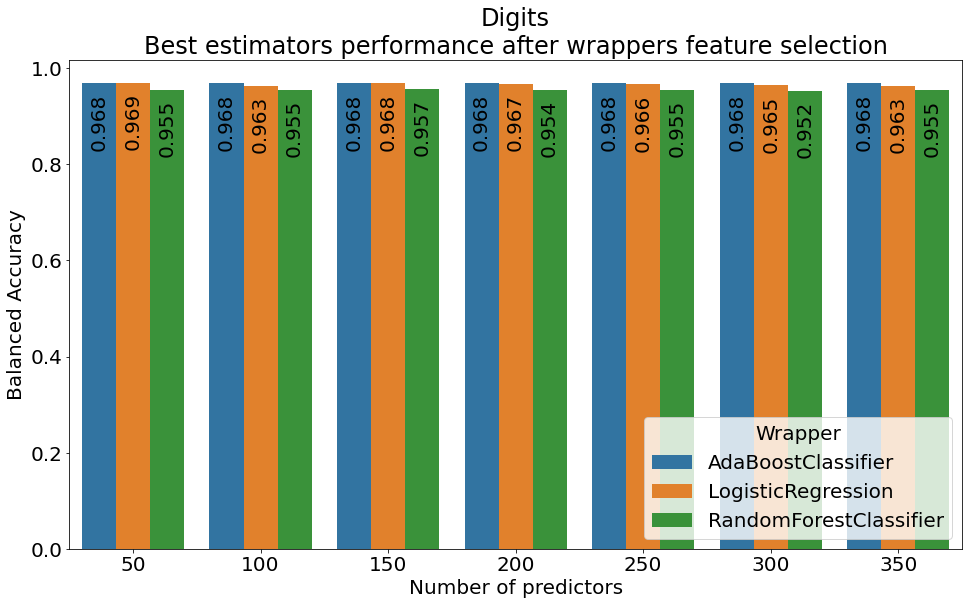

In [19]:
bars = sns.barplot(x='k', y='BA score', hue='Wrapper', data=vis_digits)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()*0.9), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Wrapper')
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Digits\nBest estimators performance after wrappers feature selection')
plt.show()

In [20]:
vis_art = art_results.sort_values('BA score', ascending=False).groupby(['k', 'Wrapper']).first().reset_index()
vis_art

,k,Wrapper,Classifier,BA score,scale,scaled
0,50,AdaBoostClassifier,XGBClassifier,0.812,NaN,True
1,50,LogisticRegression,LGBMClassifier,0.786,NaN,True
2,50,RandomForestClassifier,XGBClassifier,0.850,NaN,True
3,100,AdaBoostClassifier,XGBClassifier,0.812,NaN,True
4,100,LogisticRegression,LGBMClassifier,0.786,NaN,True
5,100,RandomForestClassifier,RandomForestClassifier,0.866,NaN,True
6,150,AdaBoostClassifier,XGBClassifier,0.812,NaN,True
7,150,LogisticRegression,LGBMClassifier,0.786,NaN,True
8,150,RandomForestClassifier,RandomForestClassifier,0.860,NaN,True
9,200,AdaBoostClassifier,XGBClassifier,0.812,NaN,True


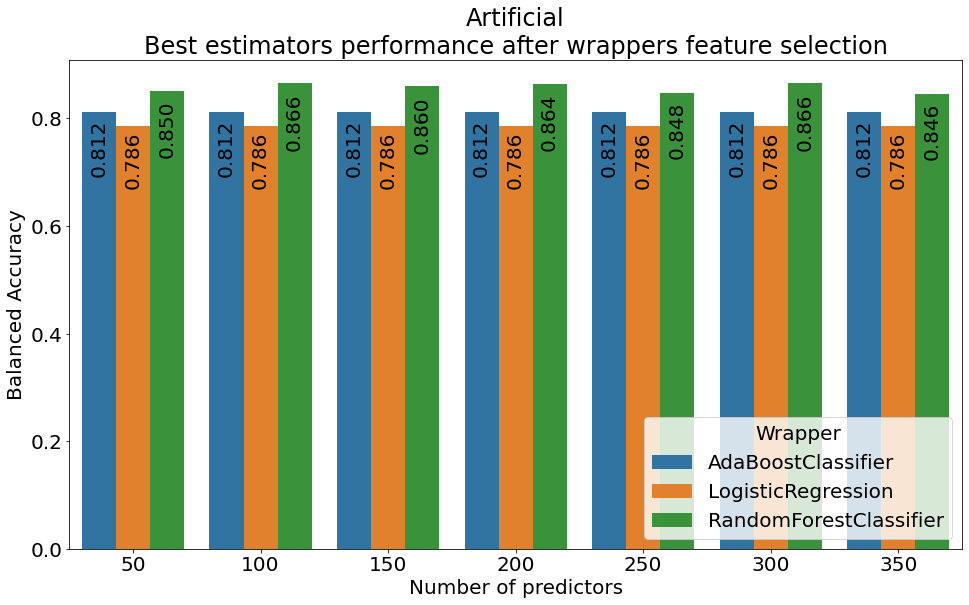

In [21]:
bars = sns.barplot(x='k', y='BA score', hue='Wrapper', data=vis_art)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()*0.9), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Wrapper')
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Artificial\nBest estimators performance after wrappers feature selection')
plt.show()

In [24]:
#TODO: skalowanie